In [37]:
import numpy as np
from matplotlib import pyplot
import faiss
%matplotlib inline
%config InlineBackend.figure_format='retina'


In [1]:
import sys
sys.path.append("/private/home/matthijs/src/big-ann-benchmarks/benchmark")

In [2]:
import dataset_io

In [3]:
basedir = "/checkpoint/matthijs/billion-scale-ann-benchmarks/"


In [5]:
xq = dataset_io.xbin_mmap(basedir + "text2image1B/query.learn.50M.fbin", dtype="float32")

In [7]:
xb = dataset_io.xbin_mmap(basedir + "text2image1B/base.1B.fbin", dtype="float32")

In [32]:
xq.shape

(50000000, 200)

In [33]:
pca = faiss.PCAMatrix(xq.shape[1], 20)
pca.train(np.vstack((xq[:1000], xb[:1000])))

xq_t = pca.apply(xq[:1000])
xb_t = pca.apply(xb[:1000])

In [45]:
!ls

MIPS_index.ipynb			   parse_baseline_results.ipynb
Untitled.ipynb				   plot
check_eval_jitter_due_to_duplicates.ipynb  python_history
meta_kmeans.ipynb			   visualize_OOD.ipynb


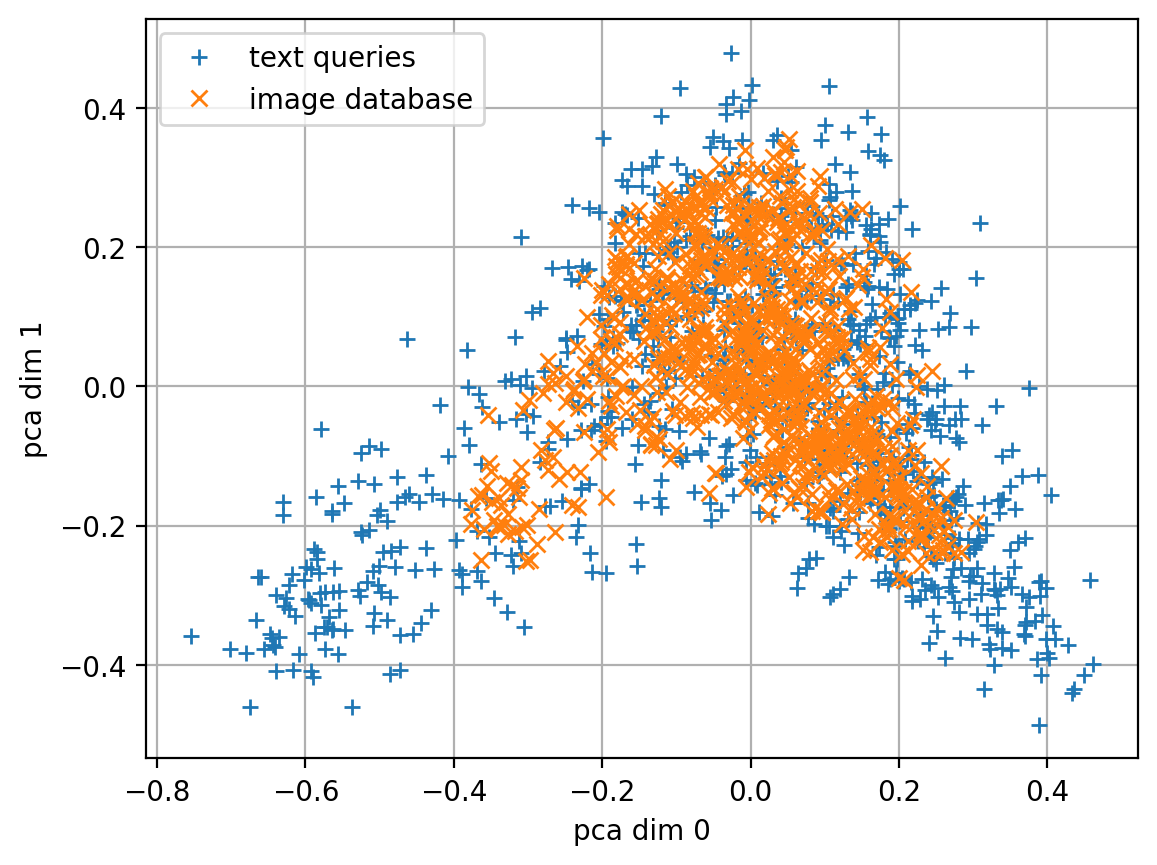

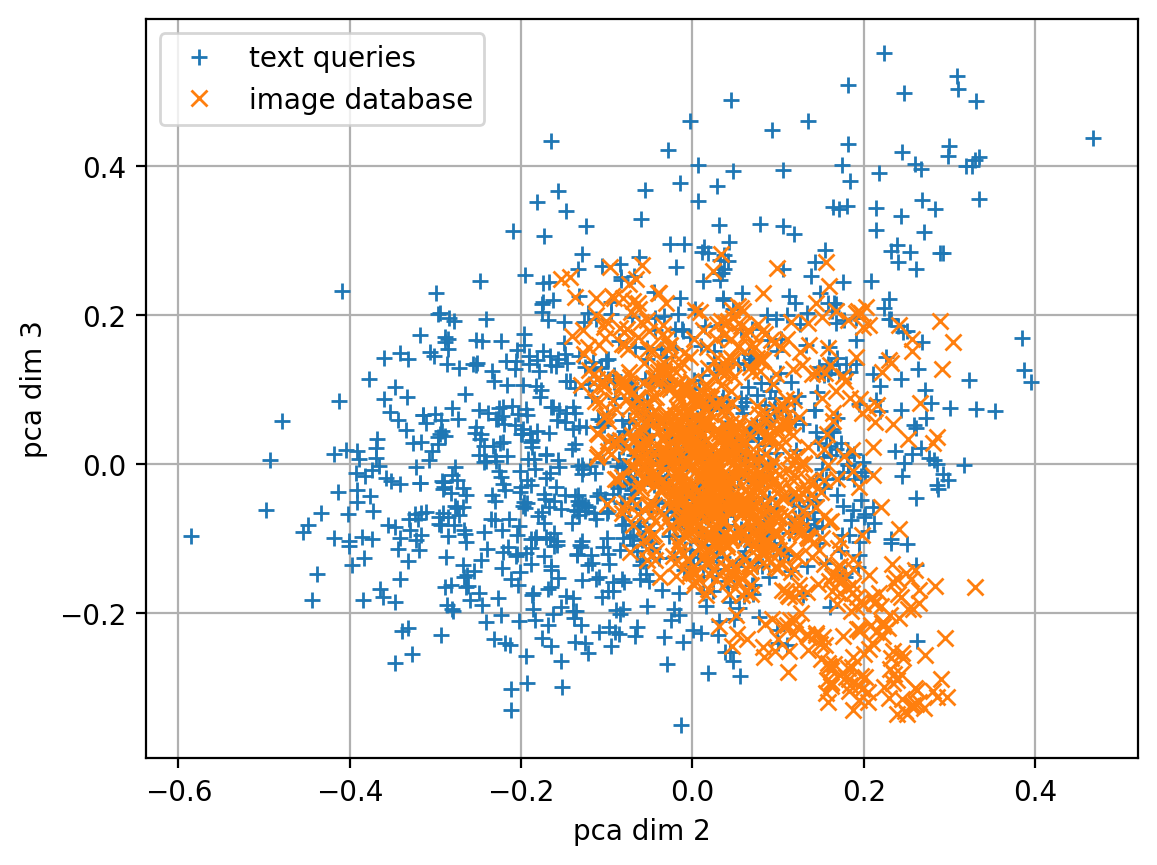

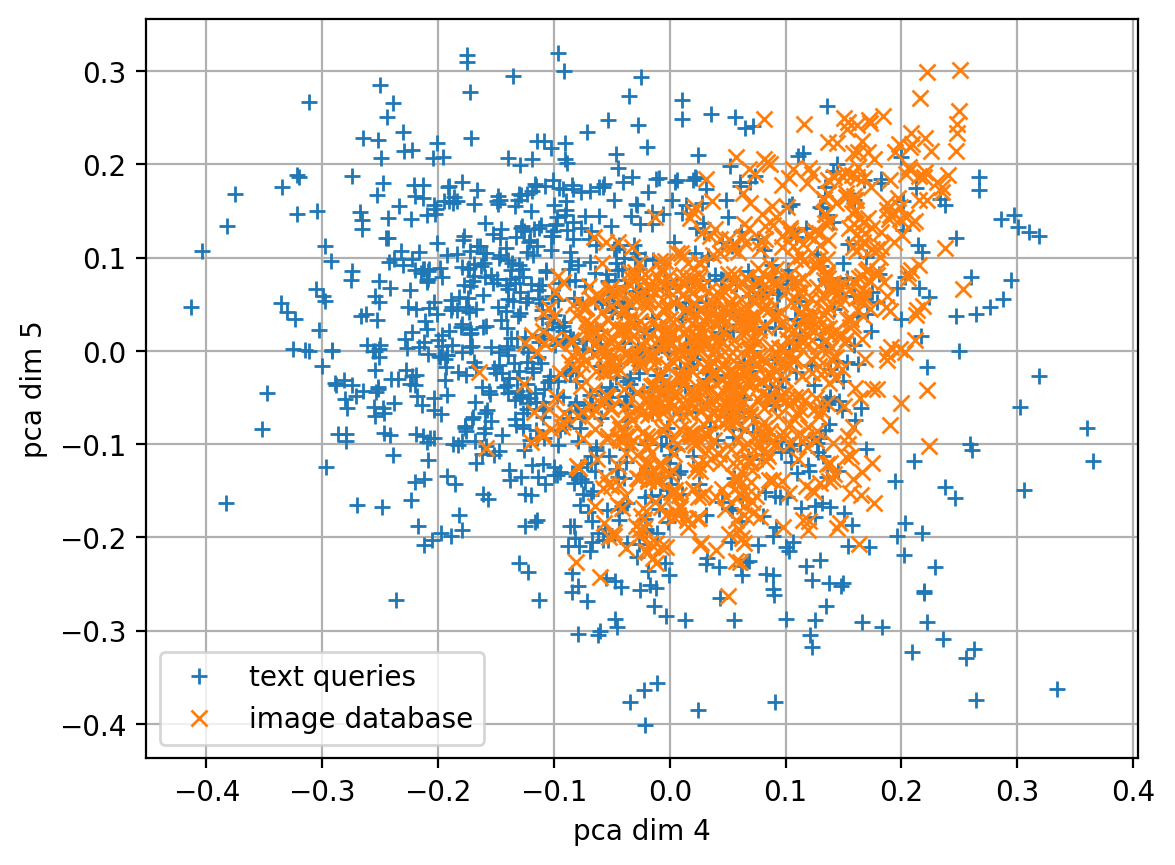

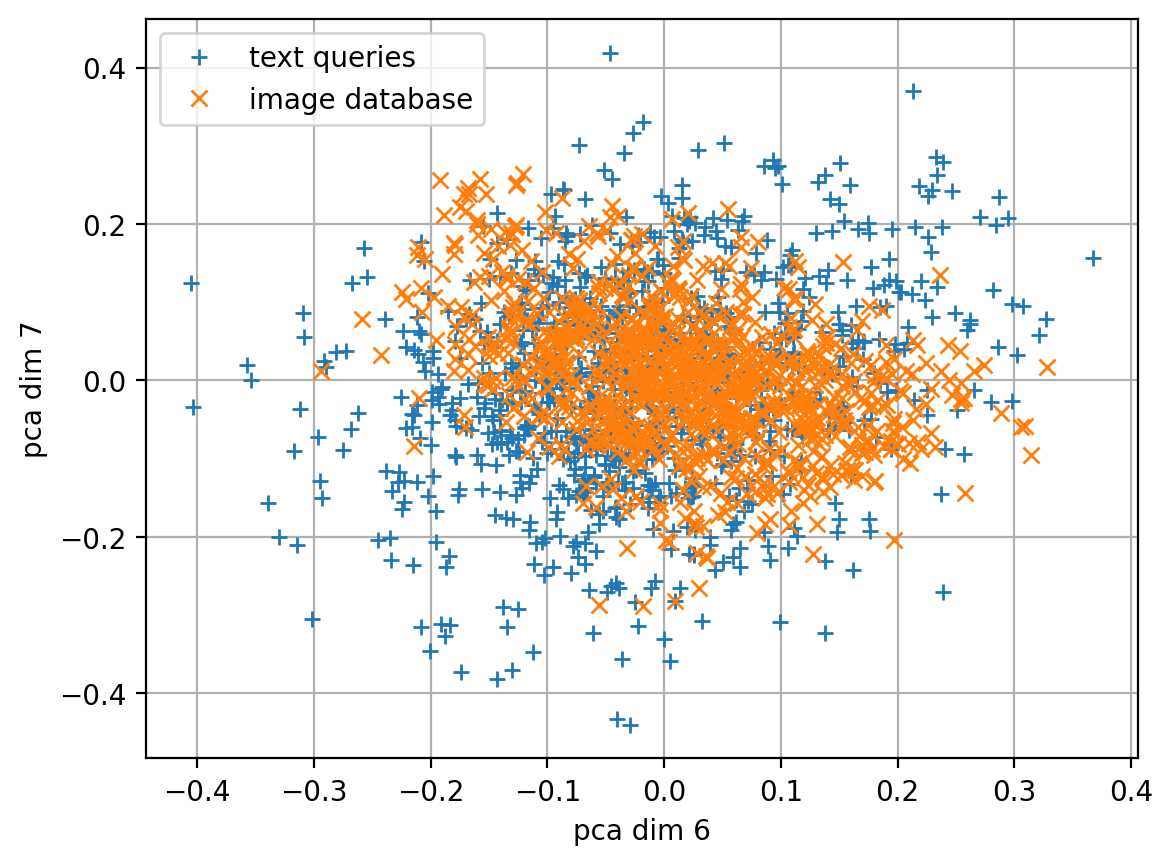

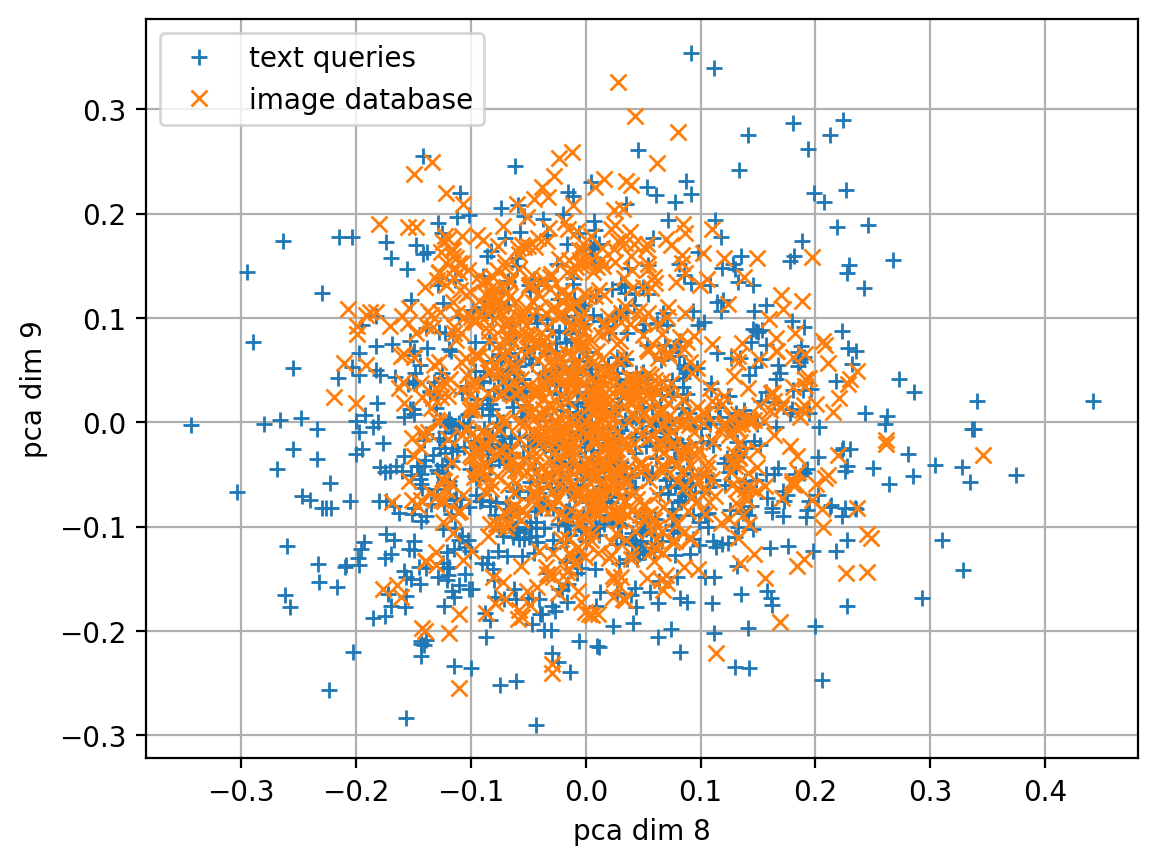

In [47]:

for dim in range(0, 10, 2): 
    pyplot.plot(xq_t[:, dim], xq_t[:, dim+1], '+', label="text queries")
    pyplot.plot(xb_t[:, dim], xb_t[:, dim+1], 'x', label="image database")
    pyplot.xlabel(f"pca dim {dim}")
    pyplot.ylabel(f"pca dim {dim + 1}")    
    pyplot.legend()
    pyplot.grid()
    pyplot.savefig(f"plot/PCA_OOD_dim{dim}_{dim+1}.pdf", bbox_inches='tight', pad_inches=0)
    pyplot.show()